In [ ]:
!pip install scikit-learn==1.1.1 -i https://pypi.tuna.tsinghua.edu.cn/simple

In [ ]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Правильность на обучающем наборе:0.979
Правильность на тестовом наборе:0.810


<BarContainer object of 13 artists>

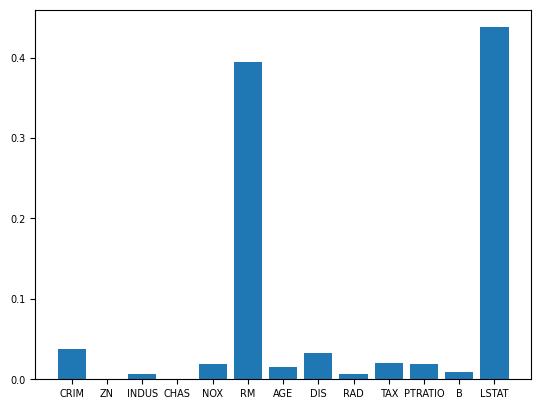

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,   random_state=0)
forest = RandomForestRegressor(n_estimators=19, random_state=0)
forest.fit(X_train, y_train)
print("Правильность на обучающем наборе:{:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе:{:.3f}".format(forest.score(X_test, y_test)))
plt.rcParams['font.size'] = '7'
plt.bar(boston.feature_names, forest.feature_importances_)

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
data=boston.data[:,5]
print(data)

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.8

In [ ]:
mean=np.mean(data)
for _ in range(len(data)):
  data[_]=data[_]-mean

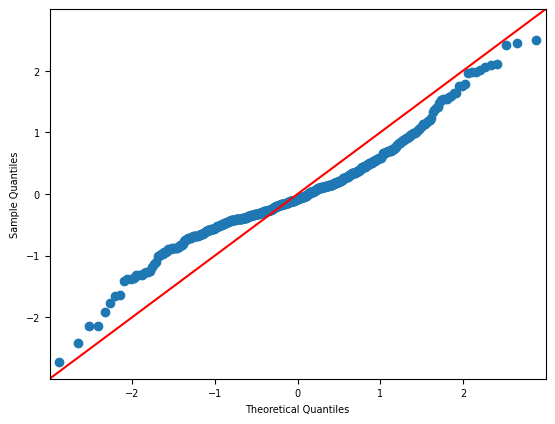

In [ ]:
fig = sm.qqplot(data, line='45')
plt.show()

In [ ]:
from scipy.stats import shapiro
#perform Shapiro-Wilk test
shapiro(data)

ShapiroResult(statistic=0.9608709812164307, pvalue=2.4107271734408187e-10)

In [ ]:
from scipy.stats import anderson
anderson(data)

AndersonResult(statistic=6.1177220513370685, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-7.02117327826186e-17, scale=0.7026171434153233)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
from scipy.stats import kstest
#perform Kolmogorov-Smirnov test
kstest(data, 'norm')

KstestResult(statistic=0.1457692511930378, pvalue=7.57142867858574e-10, statistic_location=-0.6916343873517787, statistic_sign=-1)

<Axes: >

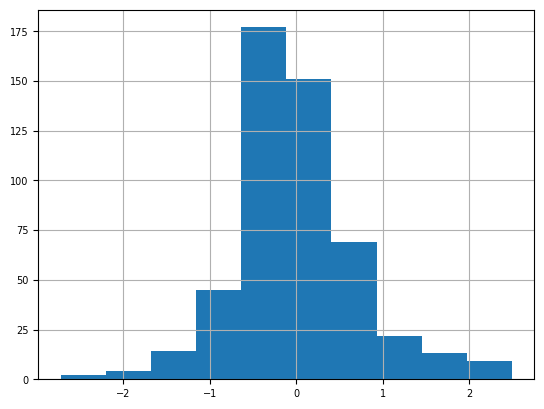

In [ ]:
pd.Series(data).hist()

Probability: 0.51


<Axes: >

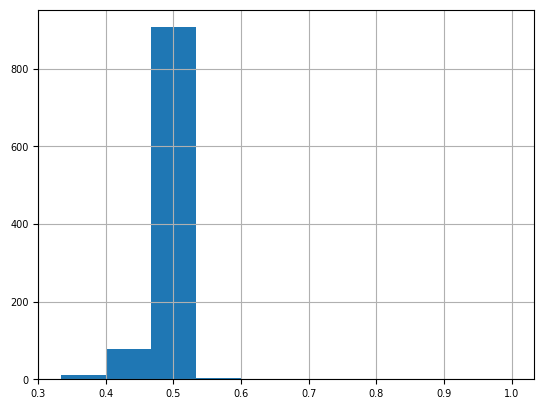

In [ ]:
import random
a=[]
b=[]
for _ in range(1000):
  coin=random.getrandbits(1)
  a.append(coin)
  b.append(np.mean(a))
print("Probability:", sum(a)/len(a))
pd.Series(b).hist()

<Axes: >

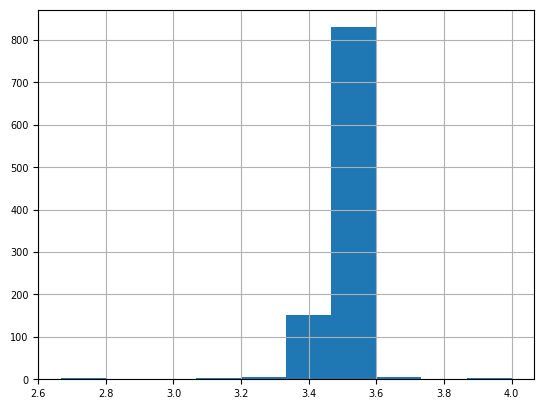

In [ ]:
a=[]
b=[]
for _ in range (1000):
  num=random.randint(1,6)
  a.append(num)
  b.append(np.mean(a))
pd.Series(b).hist()